Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Project PETROBRAS (2018/00147-5): 
## Attenuation of dynamic loading along mooring lines embedded in clay

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
Porto Alegre, RS, Brazil 
___

[1.   Introduction](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/01_Introduction.ipynb?flush_cache=true)  
[2.   Reduced model scaling](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/02_Reduced_model.ipynb?flush_cache=true)  
[3.   Typical soil](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/03_Typical_soil.ipynb?flush_cache=true)  
[4.   The R4 studless 120mm chain](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/04_R4_studless_chain.ipynb?flush_cache=true)  
[5.   Dynamic load definition](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/05_Dynamic_load.ipynb?flush_cache=true)  
[6.   Design of chain anchoring system](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/06_Chain_anchor.ipynb?flush_cache=true)  
[7.   Design of uniaxial load cell with inclinometer](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/07_Load_cell.ipynb?flush_cache=true)  
[8.   Location of experimental sites](https://nbviewer.jupyter.org/github/mmaiarocha/Attenuation/blob/master/08_Experimental_sites.ipynb?flush_cache=true) 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)
import numpy  as  np
import pandas as  pd
from   MRPy   import *
import matplotlib.pyplot as plt

# Importing "pandas dataframe" with typical load simulations
data = pd.read_excel('resources/pd_Load.xlsx', sheet_name='L7')

### 5. Dynamic load definition

The experimental setup must be designed for a scaled load magnitude compatible with
a simulation provided by Petrobras, denoted as "Line 7" from _FPSO Cidade de Angra dos Reis_.
The mooring line axial load is simulated for both the fairlead and the TDP, 
which differs due to the flexibility of the long poliester rope connecting these two nodes. 

The following script plots the complete original time series:


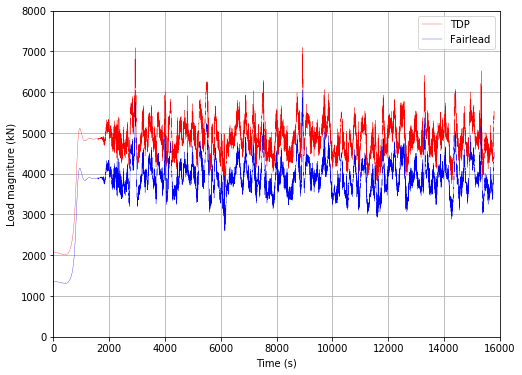

In [2]:
t      =  np.array(data.index)[0:-1]
fs     =  len(t)/t[-1]
P      =  MRPy(data.values, fs)

fig1   =  plt.figure(1, figsize=[8,6])

plt.plot(t, P[0], lw=0.3, color='red')
plt.plot(t, P[1], lw=0.3, color='blue')
plt.axis([0, 16000, 0, 8000])
plt.xlabel('Time (s)')
plt.ylabel('Load magniture (kN)')
plt.legend(('TDP', 'Fairlead'))
plt.grid(True)


For the experimental simulation of this loading it is important to take into account the 
spectral densities, which is estimated for the stationary part of the original time series:

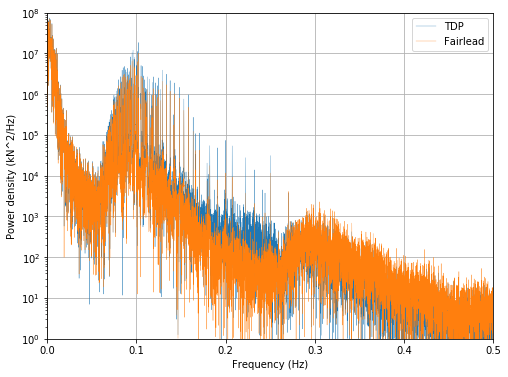

In [3]:
t1  =  2000
t2  =  15800
P   =  P.extract(segm=(t1, t2), by='time')
t   =  P.t_axis()
f   =  P.f_axis()

SP, fs =  P.periodogram()
fig2   =  plt.figure(2, figsize=[8,6])

plt.semilogy(f, SP[0],  lw=0.3)
plt.semilogy(f, SP[1],  lw=0.3)
plt.axis([0, 0.5, 1e0, 1e8])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power density (kN^2/Hz)')
plt.legend(('TDP', 'Fairlead'))
plt.grid(True)


From this periodogram one can observe that there is a higher power density around 0.1Hz. 
Recalling that the frequency scale has been calculated in [section 2](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3tyjvh3s5n12a8w/02_Reduced_model.ipynb?flush_cache=true) as 
$\lambda_f \approx 3.16:1$, this means that the experimental excitation frequency shall focuse
the frequency range around 0.32Hz.

Finally, the main statistical properties of the provided time series, which are the mean, rms, and peak values, are estimated as follows:

In [4]:
mP  = P.mean(axis=1)               # get mean values
sP  = P.std(axis=1)                # get standard deviations
gP  = P.Davenport(T=(t2-t1))       # get peak factors
pP0 = mP + gP*sP                   # get statistical maxima
pP1 = P.max(axis=1)                # get observed maxima

DatLoad = pd.DataFrame(data    =  np.vstack((mP, sP, gP, pP0, pP1)).T,
                       columns = ['mean', 'rms', 'g', 'sts_peak', 'obs_peak'],
                       index   = ['Fairlead', 'DDP'])
print(DatLoad)

                 mean         rms         g     sts_peak  obs_peak
Fairlead  4894.219004  422.015752  3.685772  6449.673041  7100.327
DDP       3926.588145  402.192011  3.625456  5384.717574  6053.126


The force scale has been estimated in [section 2](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3tyjvh3s5n12a8w/02_Reduced_model.ipynb?flush_cache=true) as $\lambda_F = 1:1000$, what means 
that the maximum axial force to be applied to the chain model is expected to lie between 5.4 and 6.5kN (statistical processing) or 6.0 and 7.1kN (as observed).